In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nilmtk import DataSet
DATA_PATH = ".\data\REFIT.h5"
refit = DataSet(DATA_PATH)

In [12]:
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

Inspiration: https://github.com/nilmtk/nilmtk-contrib/blob/master/sample_notebooks/NILMTK%20API%20Tutorial.ipynb

In [13]:
from nilmtk.api import API
import warnings
#warnings.filterwarnings("ignore")

In [14]:
from disaggregate.seq2point import Seq2Point
from disaggregate.seq2seq import Seq2Seq
from disaggregate.bert import BERT

In [5]:
refit.buildings[5].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=5, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=5, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=5, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=5, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=5, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=5, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, buildin

In [18]:
freezer = {
  "power": {"mains": ["apparent","active"],"appliance": ["apparent","active"]},
  "sample_rate": 60,
  "appliances": ["fridge freezer"],
  "methods": {"Seq2Point": Seq2Point({"n_epochs": 5}), "Seq2Seq": Seq2Seq({"n_epochs": 5}), "Bert": BERT({"n_epochs": 1})},
  "display_predictions": True,
  "train": {    
    "datasets": {
        "Dataport": {
            "path": "data/REFIT.h5",
            "buildings": {
                5: {
                    "start_time": "2014-04-01",
                    "end_time": "2014-04-30"
                    }
                }                
            }
        }
    },
  "test": {
    "datasets": {
        "Dataport": {
            "path": "data/REFIT.h5",
            "buildings": {
                5: {
                    "start_time": "2014-04-15",
                    "end_time": "2014-04-20"
                    }
                }
            }
        },
        "metrics":["rmse"]
    }
}

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : BERT
............  rmse  ..............
                Seq2Point    Seq2Seq       Bert
fridge freezer  49.265704  51.143599  69.962514


C:\Users\dejan\miniconda3\envs\energy_env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


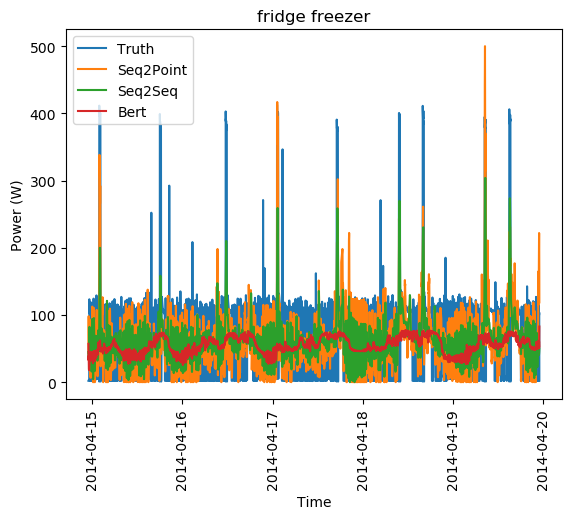

In [19]:
freezer_model = API(freezer)

In [23]:
errors_keys = freezer_model.errors_keys
errors = freezer_model.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Dataport_5_rmse
                  Seq2Seq
fridge freezer  43.049526
computer        28.863447





In [24]:
ndir(freezer_model)

['DROP_ALL_NANS',
 'appliances',
 'artificial_aggregate',
 'call_predict',
 'chunk_size',
 'classifiers',
 'compute_loss',
 'display_predictions',
 'dropna',
 'errors',
 'errors_keys',
 'experiment',
 'gt_overall',
 'methods',
 'metrics',
 'power',
 'pred_overall',
 'predict',
 'sample_period',
 'site_only',
 'store_classifier_instances',
 'storing_key',
 'test_chunk_wise',
 'test_datasets_dict',
 'test_jointly',
 'test_mains',
 'test_submeters',
 'train_chunk_wise',
 'train_datasets_dict',
 'train_jointly',
 'train_mains',
 'train_submeters']

In [ ]:
preds = freezer_model.pred_overall["Seq2Seq"]
preds

In [ ]:
freezer_model.display_predictions

In [22]:
Seq2Point({"n_epochs": 10}).return_network().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 90, 30)            330       
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 74, 50)            10050     
_________________________________________________________________
dropout_21 (Dropout)         (None, 74, 50)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 70, 50)            12550     
_________________________________________________________________
dropout_22 (Dropout)         (None, 70, 50)           

In [20]:
BERT({"n_epochs": 10}).return_network().summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 99, 16)            80        
_________________________________________________________________
l_ppool_3 (LPpool)           (None, 50, 16)            0         
_________________________________________________________________
token_and_position_embedding (None, 50, 16, 32)        643168    
_________________________________________________________________
transformer_block_3 (Transfo (None, 50, 16, 32)        10656     
_________________________________________________________________
flatten_9 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 25600)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 99)              